#### Importacion de librerias 

In [1]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import truncnorm

## Selección de Dataset

##### https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

#### Leyendo el dataset

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Cantidad de registros

In [5]:
df.shape[0]

1000

#### Explicacion de columnas


####
  gender → Género del estudiante (male o female).
####
 race → Grupo étnico al que pertenece el estudiante (group A, group B, etc.).
####
 parental_level_of_education → Nivel educativo más alto alcanzado por los padres (some college, bachelor's degree, etc.).
####
 lunch → Tipo de almuerzo que recibe el estudiante (standard o free/reduced).
####
 test_preparation_course → Si el estudiante completó un curso de preparación para los exámenes (none o completed).
####
 math_score → Puntuación obtenida en el examen de matemáticas (escala de 0 a 100).
####
 reading_score → Puntuación obtenida en el examen de lectura (escala de 0 a 100).
####
 writing_score → Puntuación obtenida en el examen de escritura (escala de 0 a 100).
####
 GPA → Promedio general del estudiante convertido a una escala de 4.0.

##### Analizando tipos de datos en las columnas

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### Generando una nueva columna GPA(Grade Point Average) a partir de las notas del df, para hacer un analisas mas completo

In [7]:
df["GPA"] = df[["math score", "reading score", "writing score"]].mean(axis=1) * (4 / 100)

In [8]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,female,group B,bachelor's degree,standard,none,72,72,74,2.906667
1,female,group C,some college,standard,completed,69,90,88,3.293333
2,female,group B,master's degree,standard,none,90,95,93,3.706667


In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'GPA'],
      dtype='object')

##### Limpiando nombres de columnas

In [10]:
df.columns = ['gender', 'race', 'parental_level_of_education', 'lunch',
        'test_preparation_course', 'math_score', 'reading_score',
        'writing_score', 'GPA']

#### Columnas con su tipo de dato

In [11]:
df.dtypes

gender                          object
race                            object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
GPA                            float64
dtype: object

#### columnas categoricas

In [12]:
cat_cols = []

for c in df.columns:
    if df[c].dtype == 'O':
        cat_cols.append(c)


In [13]:
cat_cols

['gender',
 'race',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

#### columnas numericas

In [14]:
num_cols = []

for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64': 
        num_cols.append(c)


In [15]:
num_cols

['math_score', 'reading_score', 'writing_score', 'GPA']

#### Descripcion de datos numericos

In [16]:
df.describe()

,math_score,reading_score,writing_score,GPA
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,2.710827
std,15.16308,14.600192,15.195657,0.570293
min,0.00000,17.000000,10.000000,0.360000
25%,57.00000,59.000000,57.750000,2.333333
50%,66.00000,70.000000,69.000000,2.733333
75%,77.00000,79.000000,79.000000,3.106667
max,100.00000,100.000000,100.000000,4.000000


#### Histograma de las variables numericas 

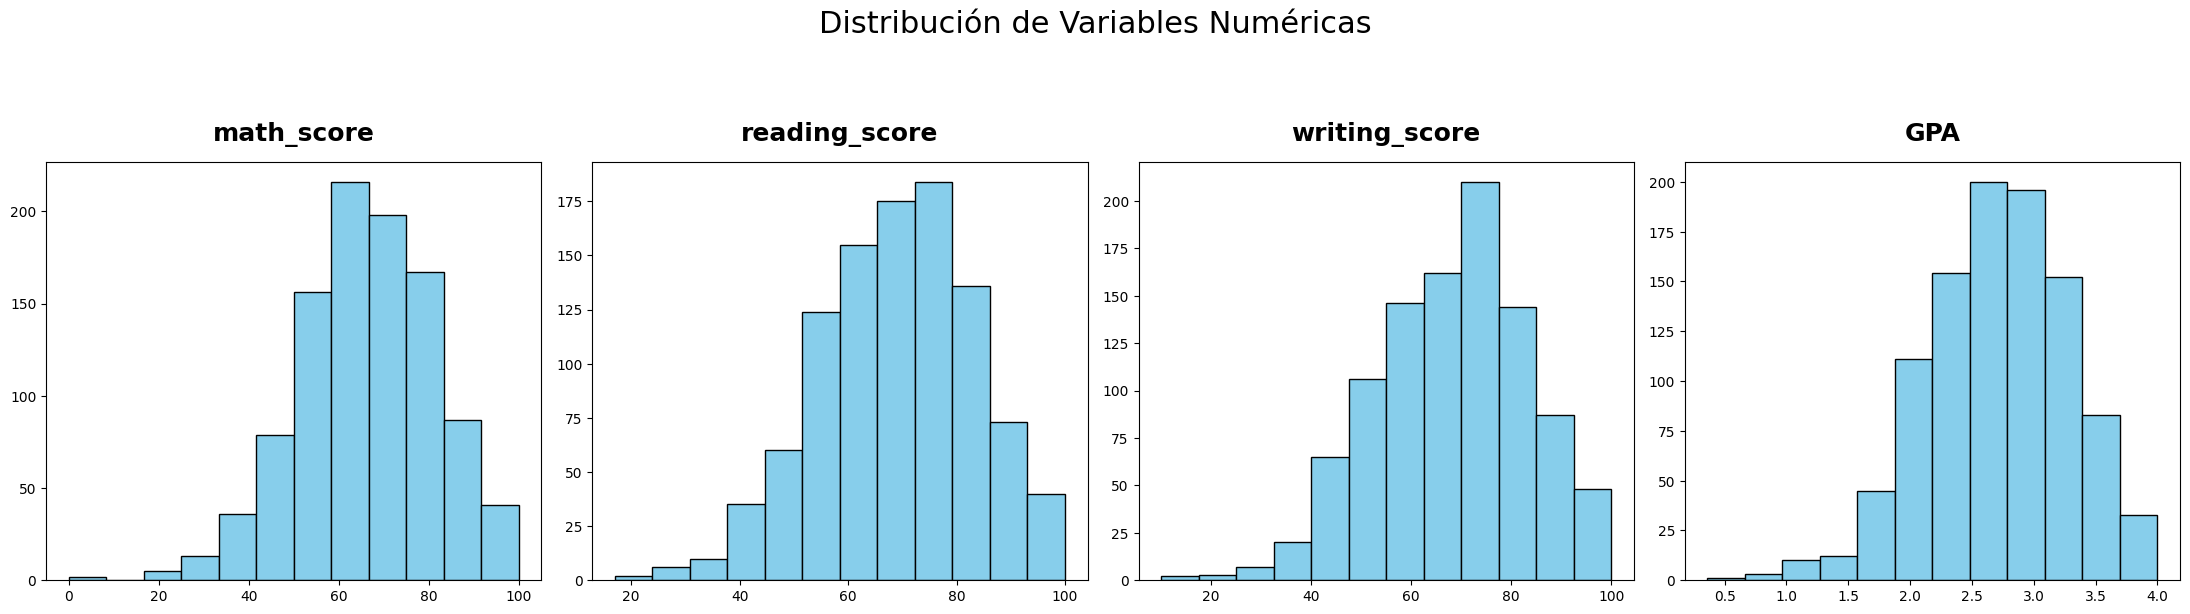

In [17]:
import matplotlib.pyplot as plt

axes = df[num_cols].hist(
    figsize=(22, 19), bins=12, edgecolor='black', layout=(4, 4), grid=False, color='skyblue'
)

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=18,y = 1.03, fontweight='bold') 
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)  

plt.suptitle('Distribución de Variables Numéricas', fontsize=22, y=1.03)

plt.tight_layout()
plt.show()


### Distribuciones de las categorías principales

In [18]:
distribuciones = df.groupby( cat_cols , as_index=False ).agg({
    "GPA": ["count"]
})

distribuciones.columns = cat_cols + ["count"]

In [19]:
distribuciones

,gender,race,parental_level_of_education,lunch,test_preparation_course,count
0,female,group A,associate's degree,free/reduced,none,3
1,female,group A,associate's degree,standard,completed,2
2,female,group A,associate's degree,standard,none,1
3,female,group A,bachelor's degree,standard,none,3
4,female,group A,high school,free/reduced,completed,3
...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,4
207,male,group E,some college,standard,none,12
208,male,group E,some high school,free/reduced,completed,2
209,male,group E,some high school,standard,completed,6


#### Correlaciones entre variables

In [20]:
df[num_cols].corr()

,math_score,reading_score,writing_score,GPA
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
GPA,0.918746,0.970331,0.965667,1.000000


##### Correlaciones entre columnas categóricas vs numéricas

<Figure size 800x600 with 0 Axes>

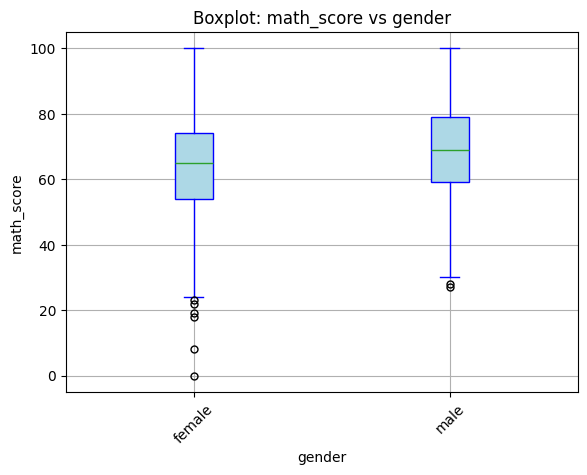

<Figure size 800x600 with 0 Axes>

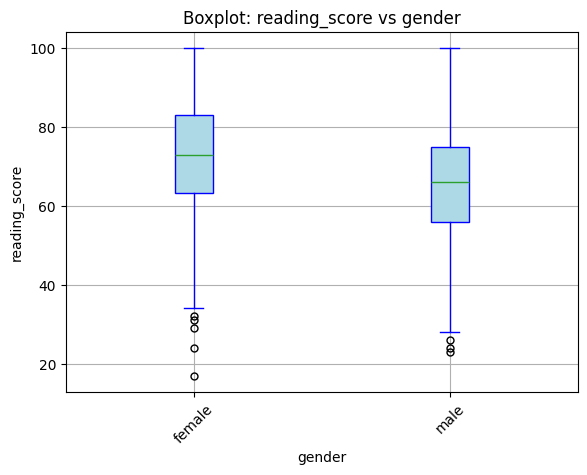

<Figure size 800x600 with 0 Axes>

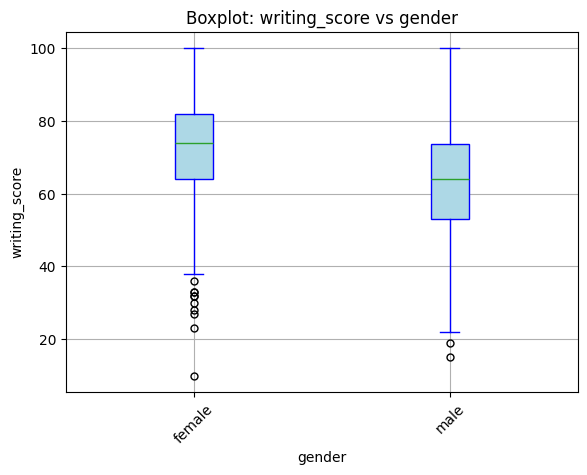

<Figure size 800x600 with 0 Axes>

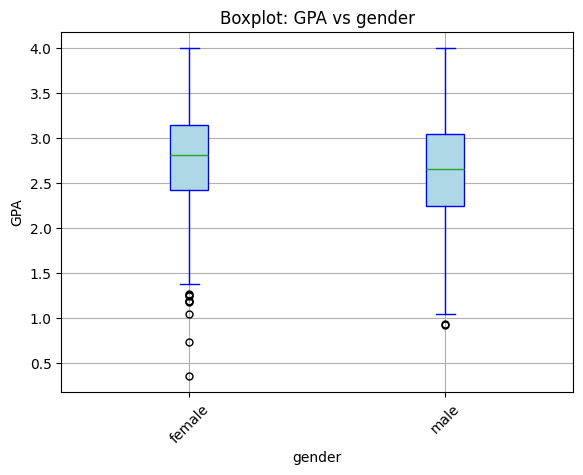

<Figure size 800x600 with 0 Axes>

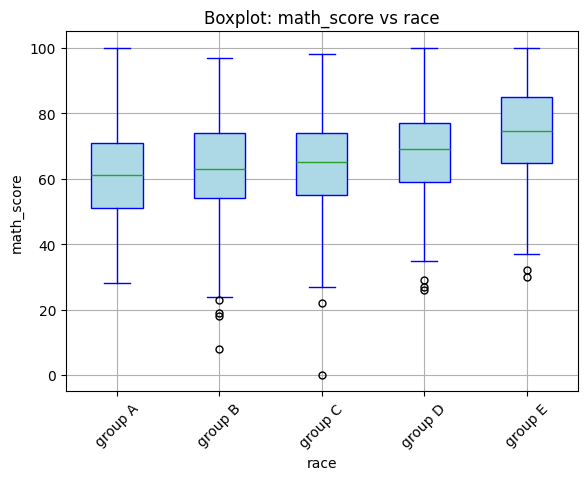

<Figure size 800x600 with 0 Axes>

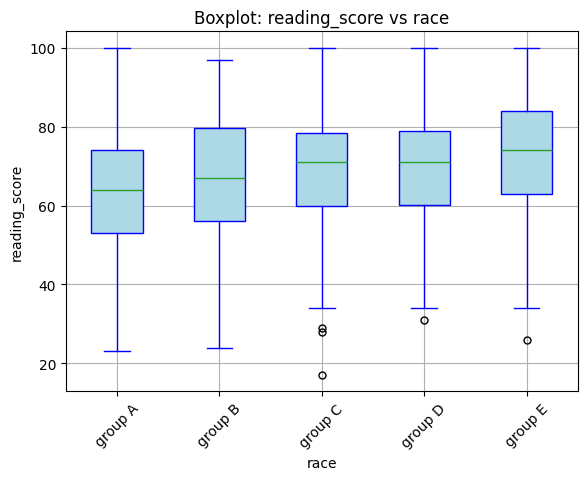

<Figure size 800x600 with 0 Axes>

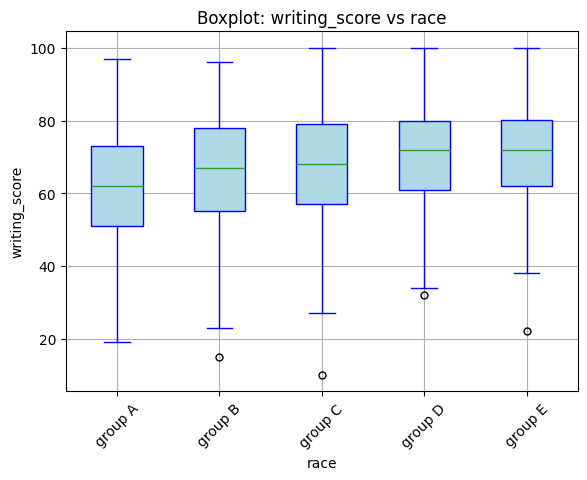

<Figure size 800x600 with 0 Axes>

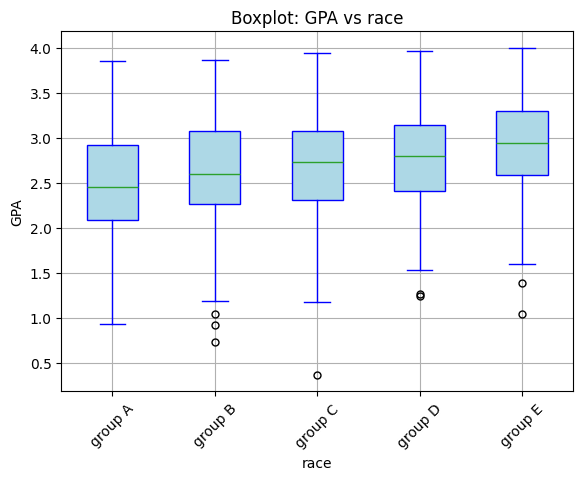

<Figure size 800x600 with 0 Axes>

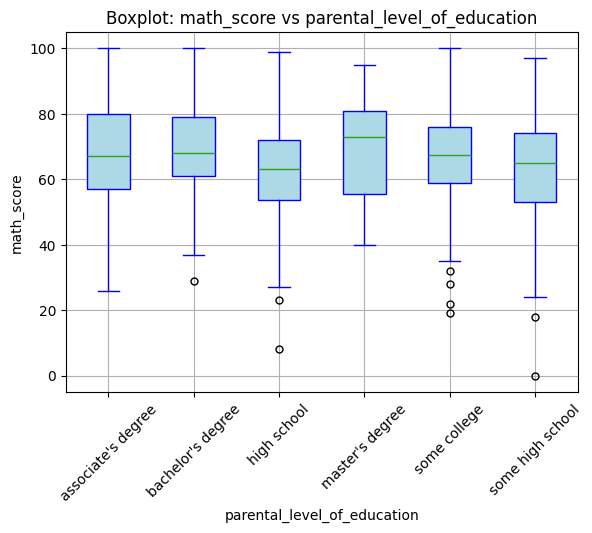

<Figure size 800x600 with 0 Axes>

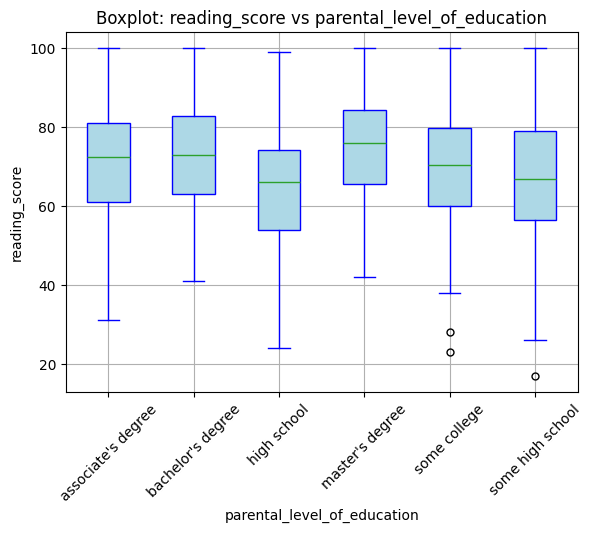

<Figure size 800x600 with 0 Axes>

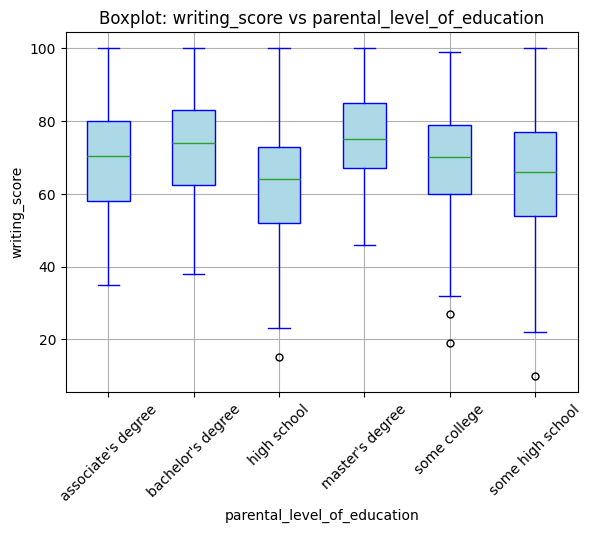

<Figure size 800x600 with 0 Axes>

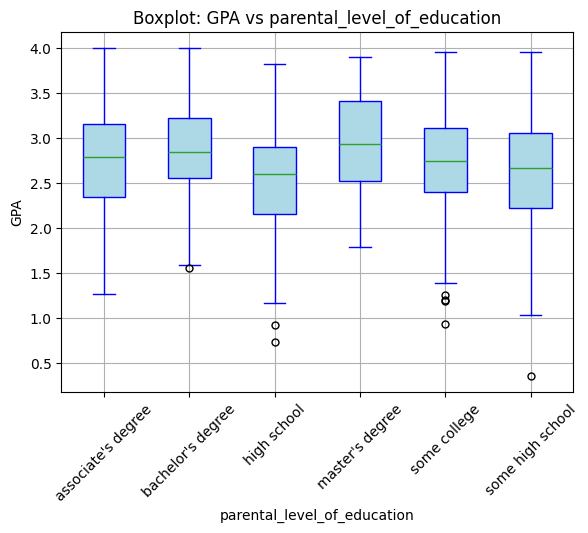

<Figure size 800x600 with 0 Axes>

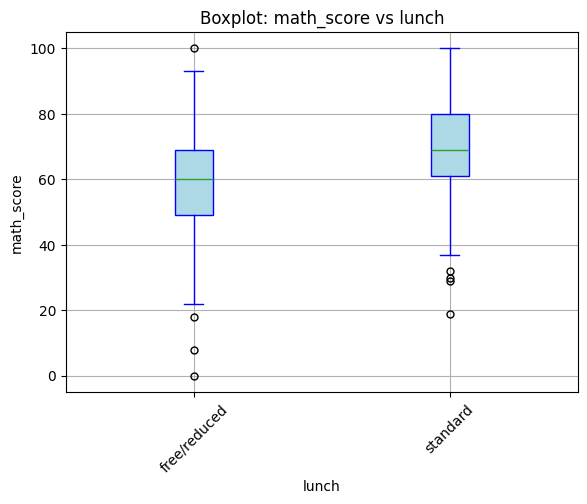

<Figure size 800x600 with 0 Axes>

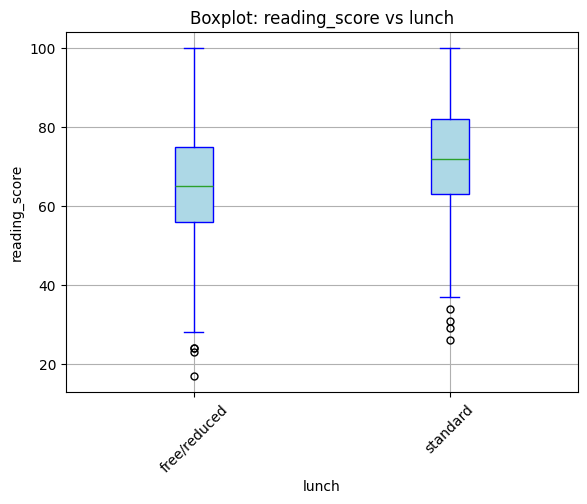

<Figure size 800x600 with 0 Axes>

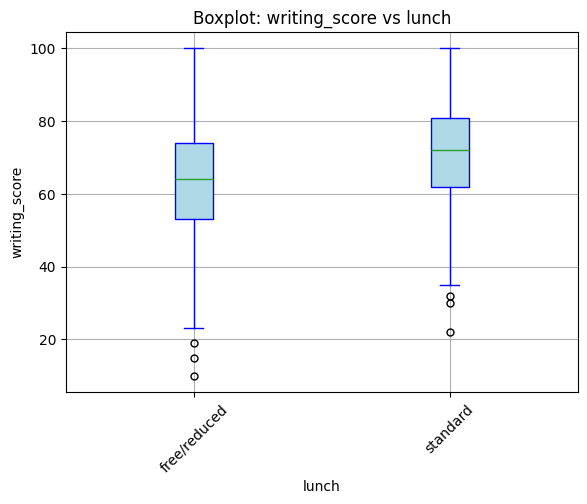

<Figure size 800x600 with 0 Axes>

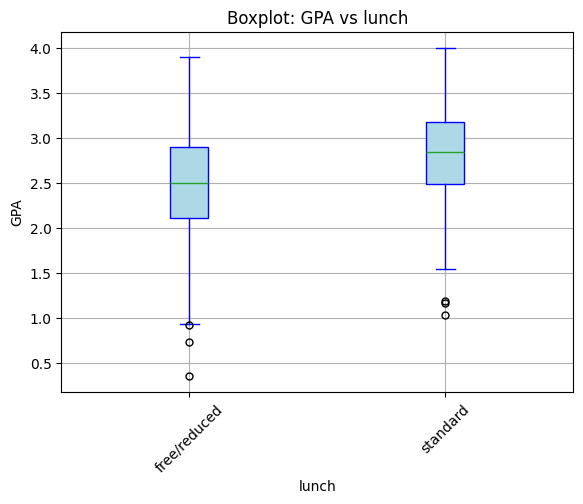

<Figure size 800x600 with 0 Axes>

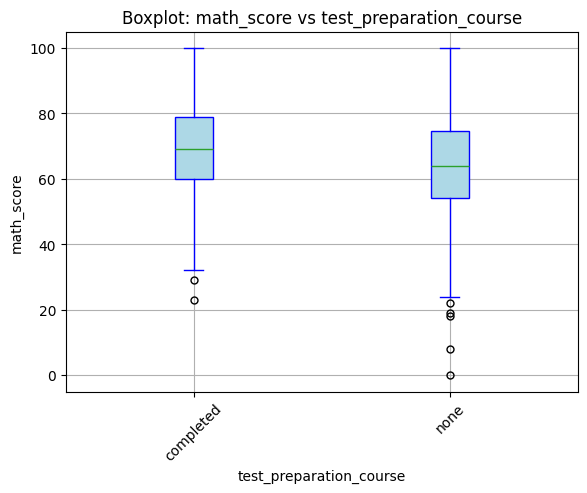

<Figure size 800x600 with 0 Axes>

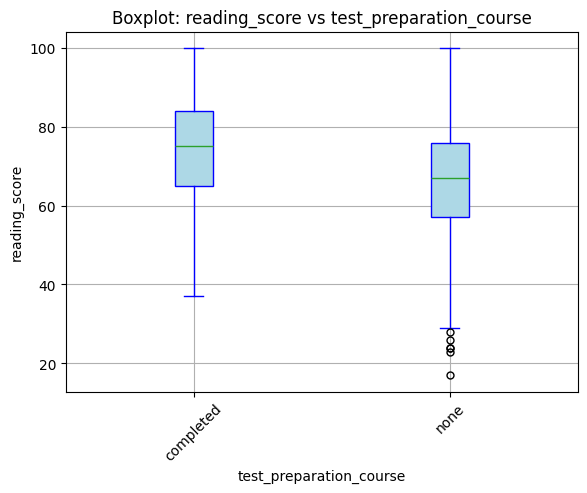

<Figure size 800x600 with 0 Axes>

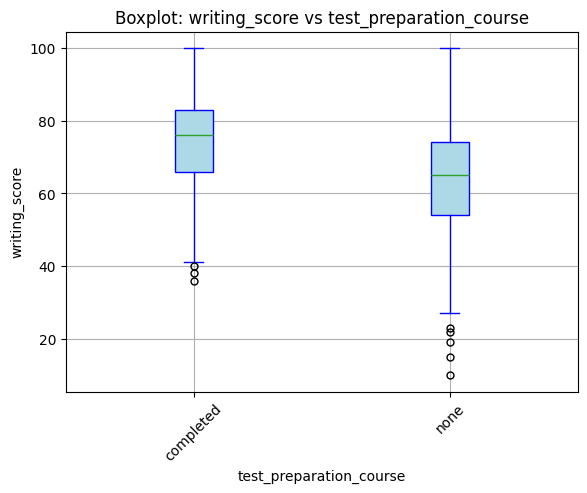

<Figure size 800x600 with 0 Axes>

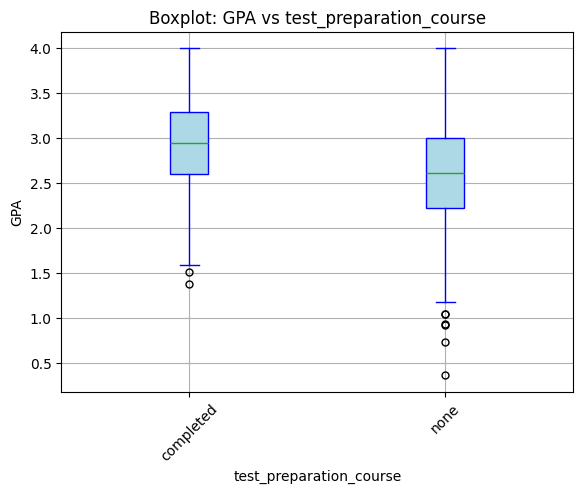

In [21]:
for cat_col in cat_cols:
    for num_col in num_cols:
        # Crear figura
        plt.figure(figsize=(8, 6))
        
        df.boxplot(column=num_col, by=cat_col, grid=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='blue'),
                    whiskerprops=dict(color='blue'),
                    flierprops=dict(marker='o', color='red', markersize=5),
                    capprops=dict(color='blue'))

        # Personalizar gráfico
        plt.title(f"Boxplot: {num_col} vs {cat_col}")
        plt.suptitle('')  
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)  # Rota etiquetas para una mejor visualización
        plt.grid(True)

        plt.show()


##### las columnas categóricas que se para utilizarán en el paso de simulación seran:
##### *test_preparation_course
##### *parental_level_of_education
##### *gender

#### Agrupando cateogiras para obtener su probabilidad 

In [22]:
prob_freq = df.groupby( cat_cols , as_index=False ).agg({
    "GPA": ["count"]
})

prob_freq.columns = cat_cols + ["frecuencia"]

In [23]:
prob_freq

,gender,race,parental_level_of_education,lunch,test_preparation_course,frecuencia
0,female,group A,associate's degree,free/reduced,none,3
1,female,group A,associate's degree,standard,completed,2
2,female,group A,associate's degree,standard,none,1
3,female,group A,bachelor's degree,standard,none,3
4,female,group A,high school,free/reduced,completed,3
...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,4
207,male,group E,some college,standard,none,12
208,male,group E,some high school,free/reduced,completed,2
209,male,group E,some high school,standard,completed,6


##### Revisando si la suma da 1

In [24]:
np.sum( prob_freq["frecuencia"] / df.shape[0] )

np.float64(1.0)

##### Sacando en porcentaje 

In [25]:
prob_freq["porcentaje"] = prob_freq["frecuencia"] / df.shape[0] 

In [26]:
prob_freq

,gender,race,parental_level_of_education,lunch,test_preparation_course,frecuencia,porcentaje
0,female,group A,associate's degree,free/reduced,none,3,0.003
1,female,group A,associate's degree,standard,completed,2,0.002
2,female,group A,associate's degree,standard,none,1,0.001
3,female,group A,bachelor's degree,standard,none,3,0.003
4,female,group A,high school,free/reduced,completed,3,0.003
...,...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,4,0.004
207,male,group E,some college,standard,none,12,0.012
208,male,group E,some high school,free/reduced,completed,2,0.002
209,male,group E,some high school,standard,completed,6,0.006


##### Haciendo una nueva lista para las categorias seleccionadas

In [27]:
cat_cols_seleccionadas = ['test_preparation_course', 'parental_level_of_education', 'gender']

##### las variables numericas se mantienen igual 

In [29]:
num_cols

['math_score', 'reading_score', 'writing_score', 'GPA']

<Figure size 6000x2000 with 0 Axes>

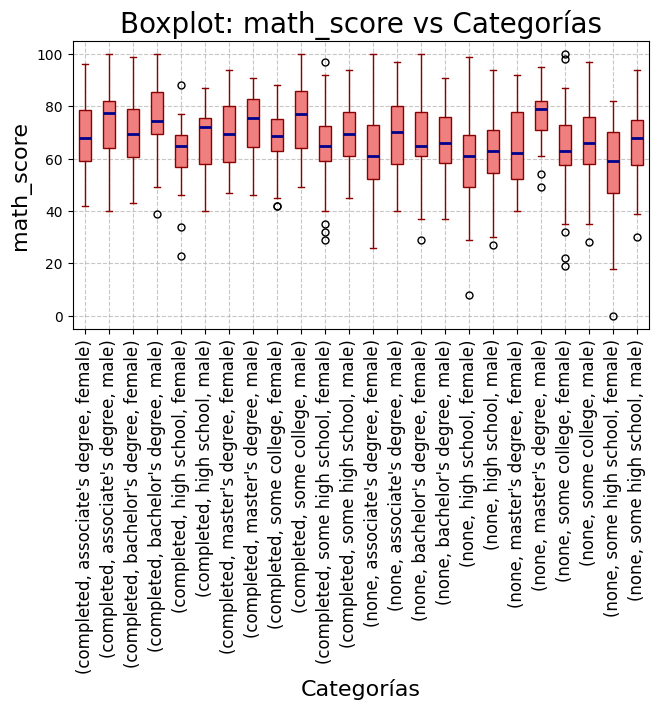

<Figure size 6000x2000 with 0 Axes>

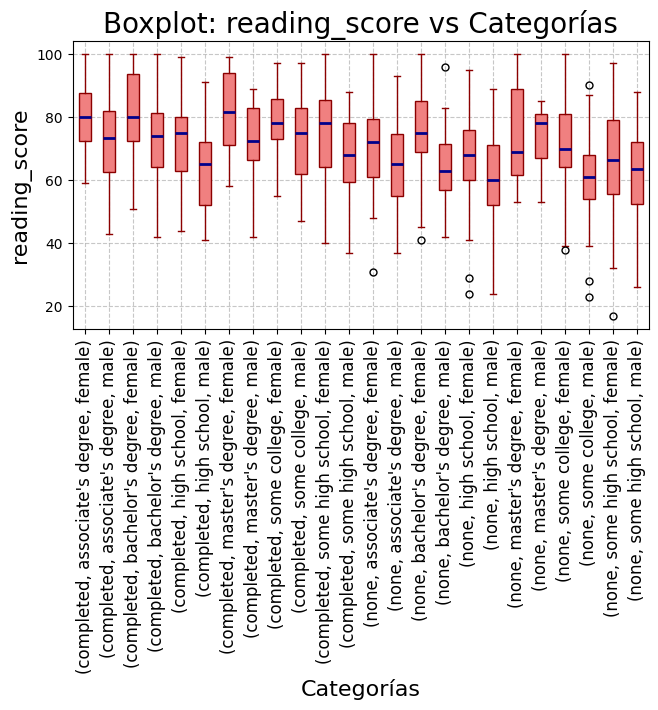

<Figure size 6000x2000 with 0 Axes>

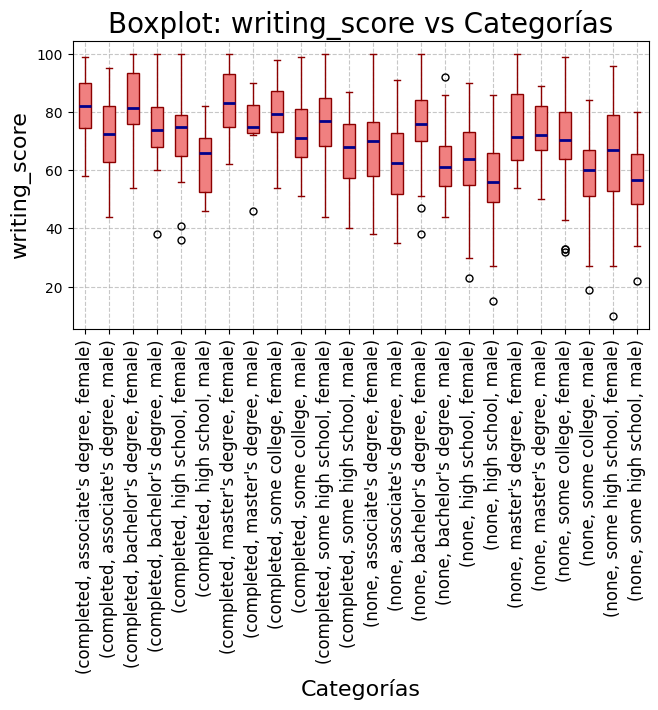

<Figure size 6000x2000 with 0 Axes>

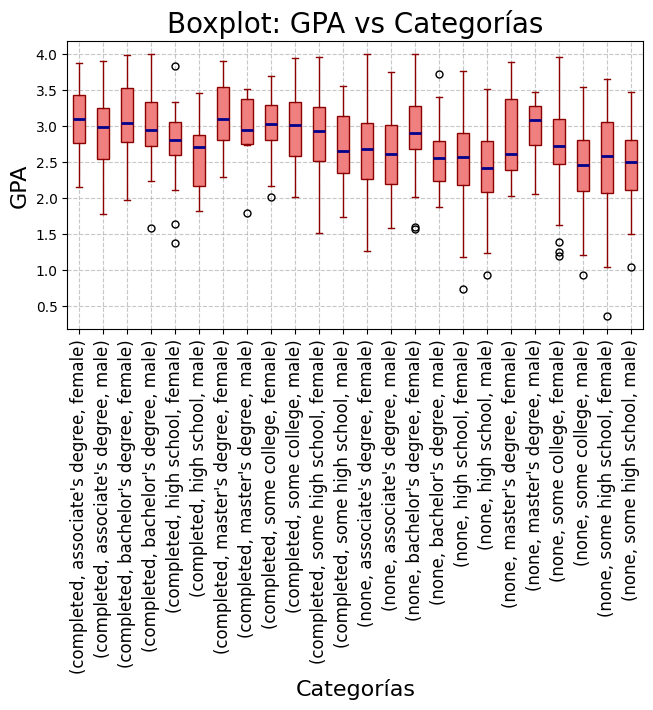

In [ ]:
for num_col in num_cols:
    plt.figure(figsize=(60, 20))  

    # Crear el boxplot agrupando por las tres categorías con nuevos colores
    df.boxplot(column=num_col, by=cat_cols_seleccionadas, grid=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', color='darkred'),  
                whiskerprops=dict(color='darkred'),
                flierprops=dict(marker='o', color='purple', markersize=5), 
                capprops=dict(color='darkred'),
                medianprops=dict(color='darkblue', linewidth=2))  
    
    # Personalizar gráfico
    plt.title(f"Boxplot: {num_col} vs Categorías", fontsize=20, color='black')
    plt.suptitle('')  # Eliminar título automático
    plt.xlabel('Categorías', fontsize=16, color='black')
    plt.ylabel(num_col, fontsize=16, color='black')
    
    # Ajustes en las etiquetas del eje X
    plt.xticks(rotation=90, fontsize=12, color='black')
    
    # Ajustar márgenes para evitar solapamiento
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.25, top=0.85)  

    plt.show()


##### Limpiando datos atipicos 

In [49]:
transformations = {}
new_cols = []

for c in num_cols:
    transformations[c] = [ 
        ('lower_bound', lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))),
        ('upper_bound', lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
    ]
    new_cols.append(f"{c}_lower_bound")
    new_cols.append(f"{c}_upper_bound")

In [50]:
df_resultados = df.groupby(cat_cols_seleccionadas, as_index=False).agg(transformations)

In [51]:
df_resultados.columns = cat_cols_seleccionadas + new_cols

In [53]:
df_resultados

,test_preparation_course,parental_level_of_education,gender,math_score_lower_bound,math_score_upper_bound,reading_score_lower_bound,reading_score_upper_bound,writing_score_lower_bound,writing_score_upper_bound,GPA_lower_bound,GPA_upper_bound
0,completed,associate's degree,female,29.750,107.750,49.000,111.000,51.250,113.250,1.768333,4.421667
1,completed,associate's degree,male,37.625,108.625,33.250,111.250,34.500,110.500,1.478333,4.318333
2,completed,bachelor's degree,female,32.750,106.750,41.000,125.000,49.750,119.750,1.643333,4.656667
3,completed,bachelor's degree,male,45.500,109.500,38.125,107.125,47.375,102.375,1.810000,4.236667
4,completed,high school,female,39.000,87.000,37.500,105.500,44.000,100.000,1.920000,3.733333
5,completed,high school,male,31.750,101.750,22.000,102.000,24.750,98.750,1.106667,3.933333
6,completed,master's degree,female,26.875,111.875,36.500,128.500,47.625,120.625,1.701667,4.648333
7,completed,master's degree,male,37.125,110.125,41.750,107.750,58.125,97.125,1.805000,4.325000
8,completed,some college,female,45.000,93.000,53.875,104.875,51.625,108.625,2.076667,4.023333
9,completed,some college,male,31.000,119.000,30.500,114.500,39.750,105.750,1.466667,4.453333
